### Statistic for AI and Data Science: Coursework 1

#### Introducing the dataset

The dataset, collected in 2017, records exits from London's underground stations on weekdays. It was compiled by Transport for London and likely relies on automated ticket barriers and occasional manual counts. 
Some underground stations are also mainline railway stops, with ticket barriers generally separating the two groups of passengers. 
People tend to enter the underground near their homes in the morning and exit near their workplaces or schools. The opposite occurs in the evening, with more people working near central London than living there.

We will focus on only the morning and evening peaks (i.e. periods AMPeak and PMPeak).


####  Part 1: Calculating Morning and Evening Peak Proportions

In [1]:
# Importing required libraries.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing csv file and saving to pd dataframe
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


In [3]:
# Creation of peak_counts dataframe using exits dataframe for am annd pm peak hours

exits['am_peak']= exits['H07']+exits['H08']+exits['H09'] #AM peak count is sum of count for AM Peak hours (H07,H08,H09)
exits['pm_peak']= exits['H16']+exits['H17']+exits['H18'] #PM peak count is sum of count for PM Peak hours (H16,H17,H18)
peak_counts = exits[['am_peak','pm_peak']]
peak_counts

,am_peak,pm_peak
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


In [4]:
# Creating 'overall total column' to peak_counts dataframe. 
# This is the sum of all exits per station irregardless of peak time.

peak_counts = peak_counts.assign(overall_total = exits.apply(sum, axis=1))
peak_counts


,am_peak,pm_peak,overall_total
Station,,,
Acton Town,1970,2628,13960
Aldgate,7408,2992,26536
Aldgate East,7618,3803,32627
Alperton,856,1847,7821
Amersham,424,1465,5794
...,...,...,...
Wimbledon Park,497,1114,4907
Wood Green,2165,6494,27648
Wood Lane,1798,1766,10174


In [5]:
# Adding Proportion columns for both AM and PM peak times
# Function to calculate AM and PM proportions
def calcAMProportion(row):
    # print(row.overall_total)
    total = peak_counts.loc[row.name, 'overall_total'] # returns overall_total number for each exit
    # print(total)
    return row.loc['am_peak'] / total 

def calcPMProportion(row):
    # print(row.overall_total)
    total = peak_counts.loc[row.name, 'overall_total']
    return row.loc['pm_peak'] / total

peak_counts2 = peak_counts.assign(am_proportion = peak_counts.apply(calcAMProportion, axis=1)) 
peak_counts2 = peak_counts2.assign(pm_proportion = peak_counts.apply(calcPMProportion, axis=1)) 

peak_counts2

,am_peak,pm_peak,overall_total,am_proportion,pm_proportion
Station,,,,,
Acton Town,1970,2628,13960,0.141117,0.188252
Aldgate,7408,2992,26536,0.279168,0.112752
Aldgate East,7618,3803,32627,0.233488,0.116560
Alperton,856,1847,7821,0.109449,0.236159
Amersham,424,1465,5794,0.073179,0.252848
...,...,...,...,...,...
Wimbledon Park,497,1114,4907,0.101284,0.227023
Wood Green,2165,6494,27648,0.078306,0.234881
Wood Lane,1798,1766,10174,0.176725,0.173580


In [6]:
# Shows datatype of each column
peak_counts2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, Acton Town to Woodside Park
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   am_peak        268 non-null    int64  
 1   pm_peak        268 non-null    int64  
 2   overall_total  268 non-null    int64  
 3   am_proportion  268 non-null    float64
 4   pm_proportion  268 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 20.7+ KB


##### Description of peak_counts2

For each station, it shows the number of people during AM and PM peak hours, along with overall total number of people, not just during peak periods.
The 'am_proportion' and 'pm_proportion' columns show the proportion of people at each station during the respective peak hours.

Columns:
- am_peak:Number of people during the morning peak hours at each station.
- pm_peak: Number of people during the evening peak hours at each station.
- overall_total: Overall total number of people at each station, not just during peak periods.
- am_proportion: Proportion of people during the morning peak hours proportionate to the overall total for each station.
- pm_proportion: Proportion of people during the evening peak hours proportionate to the overall total for each station.

####  Part 2: Plotting and Analysing Distributions

In [7]:
# Summary of the distribution of each numerical column.

peak_counts2.describe()

,am_peak,pm_peak,overall_total,am_proportion,pm_proportion
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,26221.802239,0.135487,0.199412
std,8181.784059,6276.463316,36541.138132,0.074065,0.059535
min,27.000000,239.000000,862.000000,0.031323,0.049650
25%,677.500000,1471.750000,7232.750000,0.078797,0.162175
50%,1517.000000,2622.000000,13406.000000,0.114152,0.208656
75%,4315.250000,4707.750000,29679.500000,0.173145,0.243201
max,61116.000000,59486.000000,231873.000000,0.366271,0.319683


In [8]:
peak_counts3 = peak_counts2[['am_proportion','pm_proportion']]
peak_counts3.describe()


,am_proportion,pm_proportion
count,268.000000,268.000000
mean,0.135487,0.199412
std,0.074065,0.059535
min,0.031323,0.049650
25%,0.078797,0.162175
50%,0.114152,0.208656
75%,0.173145,0.243201
max,0.366271,0.319683


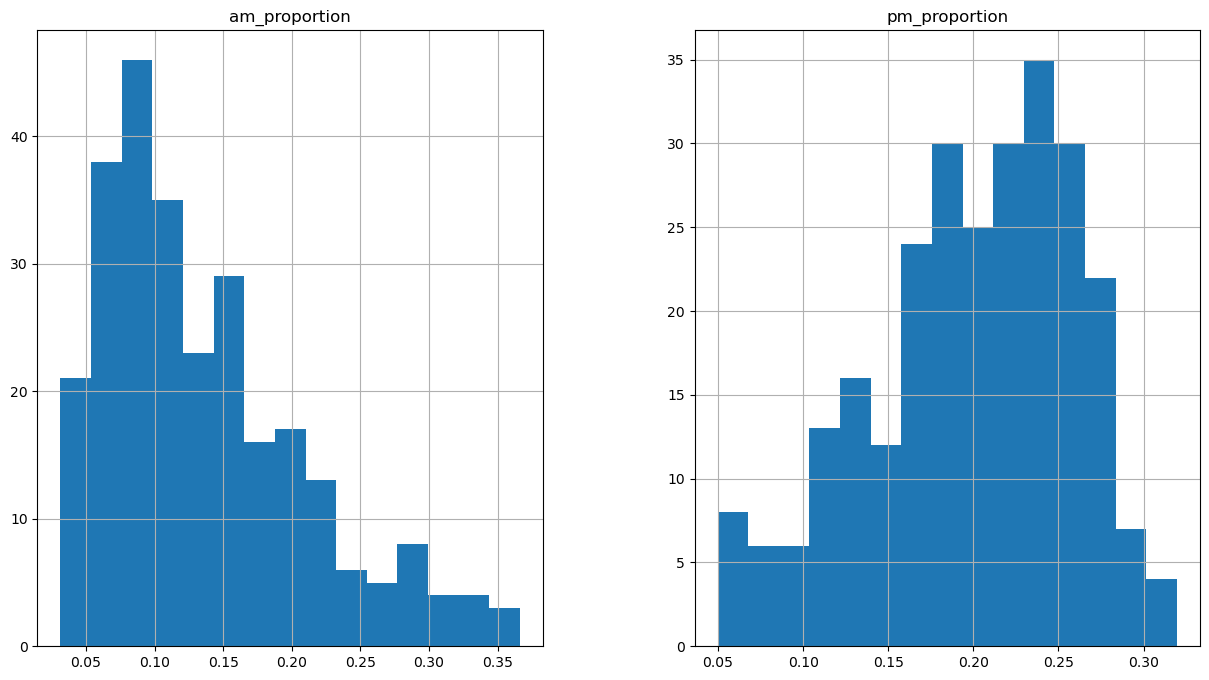

In [9]:
hist = peak_counts3.hist(bins=15, figsize=(15,8))

The analysis of 'AM Peak Proportions' reveals a negatively skewed distribution for travel pattern during the morning peak. Although the specific times aren't there, the histogram trend shows that a significant portion of AM daily exits vary. The standard deviation for AM: 0.074065 whilst PM:0.059535 was lower indicating a more predictable travel pattern during the evening peak hours. AM Peak showed a concentrated range AM:0.094348 between the first quartile (Q1) at 0.078797 and the third quartile (Q3) at 0.173145. The mean: 0.135487 and median: 0.114152 proportions show that on average, there is a lower commuting frequency during the morning peak. The interquartile range is wider for the evening peak PM:0.081026. 

The PM Peak Proportions had a negative distribution with a larger range between the first quartile (Q1) at 0.162175 and the third quartile (Q3) at 0.243201. The mean: 0.199412 and median: 0.208656 suggest there is a higher proportion of exits during the evening peak hours compared to the morning peak hours.

In summary these histograms show a change in commuter preferences depending on time of day, potential reasons for this might be more commuters using the London underground exits during PM peak hours for work/social reasons with the morning peak experiencing a decline in activity, potentially due to work related reasons, while the evening peak has a steady incline, possibly driven by social activities.



#### Part 3: A Simple Classification of Stations

,Station,am_peak,pm_peak,AM_pmratio,PM_amratio
0,Acton Town,1970,2628,0.749619,1.334010
1,Aldgate,7408,2992,2.475936,0.403888
2,Aldgate East,7618,3803,2.003155,0.499212
3,Alperton,856,1847,0.463454,2.157710
4,Amersham,424,1465,0.289420,3.455189
...,...,...,...,...,...
263,Wimbledon Park,497,1114,0.446140,2.241449
264,Wood Green,2165,6494,0.333385,2.999538
265,Wood Lane,1798,1766,1.018120,0.982202
266,Woodford,703,3889,0.180766,5.532006


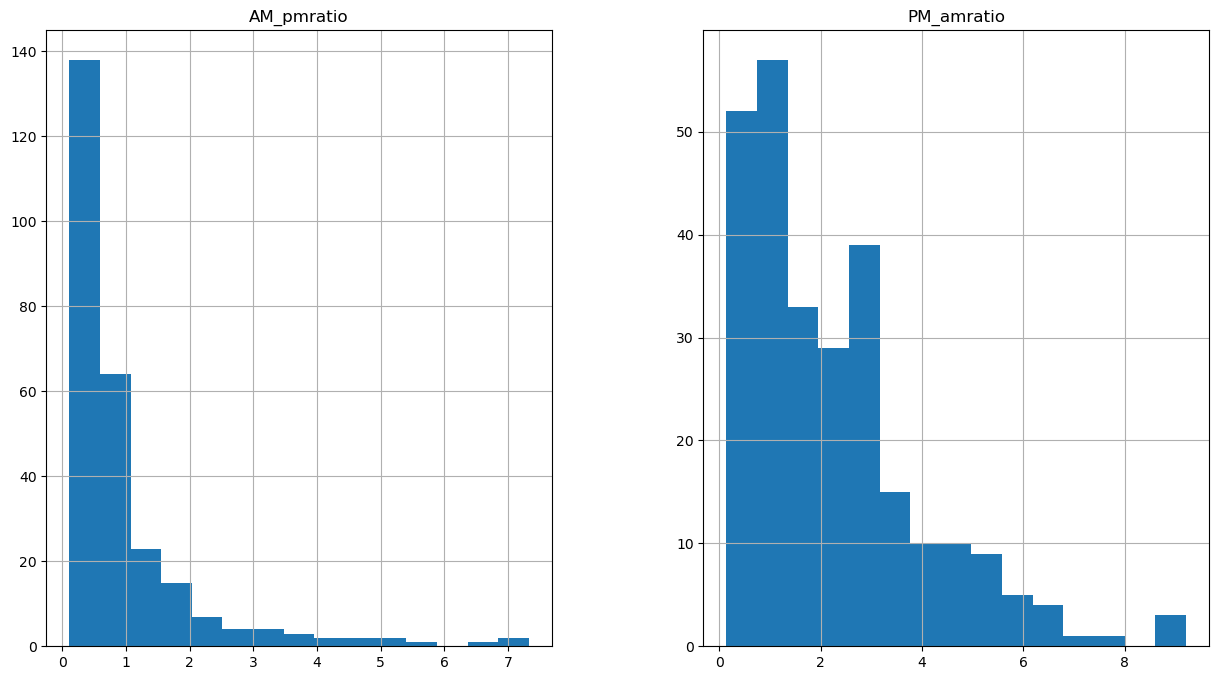

In [10]:
# Histogram of overall ratios
peak_counts2 = peak_counts2.reset_index()
peak_counts2 = peak_counts2[['Station','am_peak','pm_peak']]
peak_counts = peak_counts2[['am_peak','pm_peak']]

# Functions to calculate AMPM and PMAM Ratio.
def calcAMPMRatio(row):
    total = peak_counts.loc[row.name, 'pm_peak'] # returns ratio number for each exit
    return row.loc['am_peak'] / total 

def calcPMAMRatio(row):
    total = peak_counts.loc[row.name, 'am_peak']
    return row.loc['pm_peak'] / total

peak_counts2 = peak_counts2.assign(AM_pmratio= peak_counts2.apply(calcAMPMRatio, axis=1)) 
peak_counts2 = peak_counts2.assign(PM_amratio = peak_counts2.apply(calcPMAMRatio, axis=1))


peak_counts22 = peak_counts2[['AM_pmratio','PM_amratio']]
hist = peak_counts22.hist(bins=15, figsize=(15,8))

peak_counts2

#### Picking Threshold for Classification
I opted to use a ratio to normalise the data and because when initally viewing the table the differences seemed large between the stations and I wanted the relative relationship between morning and evening peak exits whilst accounting for these differences.

I used the histograms showing the AM/PM peak ratios of all the stations to get the threshold value that i would use to classify the Northen Line stations into  'work', 'residential' and 
'other'. To pick the threshold value I looked for the largest drop in data distribution. For Figure1. labelled AM_pmratio this was approximately  1.1. For Figure2. titled PM_amratio, this had 2 peak drops with 1 being approximately  1.6 and the other 2.5, the midpoint of these two values was used as the threshold for pm/am ratios.

In [11]:
def Northenline(station):
    l = station in {'Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 
               'Leicester Square', 'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street' }
    return l

NLinet = peak_counts2.loc[peak_counts2['Station'].apply(Northenline) == True].copy()
NLinet = NLinet.reset_index(drop=True)
NLinet

,Station,am_peak,pm_peak,AM_pmratio,PM_amratio
0,Archway,2190,4106,0.533366,1.874886
1,Balham,2637,7635,0.345383,2.895336
2,Embankment,10692,8829,1.211009,0.825758
3,Goodge Street,5374,1949,2.757311,0.362672
4,High Barnet,987,2362,0.417866,2.393110
5,Highgate,893,3170,0.281703,3.549832
6,Leicester Square,8952,12915,0.693148,1.442694
7,Morden,1550,5955,0.260285,3.841935
8,South Wimbledon,1335,2198,0.607370,1.646442
9,Tottenham Court Road,20051,13232,1.515342,0.659917


In [12]:
# Work: AM/PM ratio  > 1.1
# Residential: PM/AM ratio  > 2.05
# Other: Ratios ~ falls outside of threshold for work or residential


work_condition = NLinet['AM_pmratio'] > 1.1
residential_condition = NLinet['PM_amratio'] > (1.6+2.5)/2 #midpoint of 2 peaks in pm/am ratio histogram

# Classification of stations 
NLinet.loc[work_condition, 'Classification'] = 'Work'
NLinet.loc[residential_condition, 'Classification'] = 'Residential'
NLinet.loc[~(work_condition | residential_condition), 'Classification'] = 'Other'

NLinet

,Station,am_peak,pm_peak,AM_pmratio,PM_amratio,Classification
0,Archway,2190,4106,0.533366,1.874886,Other
1,Balham,2637,7635,0.345383,2.895336,Residential
2,Embankment,10692,8829,1.211009,0.825758,Work
3,Goodge Street,5374,1949,2.757311,0.362672,Work
4,High Barnet,987,2362,0.417866,2.393110,Residential
5,Highgate,893,3170,0.281703,3.549832,Residential
6,Leicester Square,8952,12915,0.693148,1.442694,Other
7,Morden,1550,5955,0.260285,3.841935,Residential
8,South Wimbledon,1335,2198,0.607370,1.646442,Other
9,Tottenham Court Road,20051,13232,1.515342,0.659917,Work


Some of these results are expected:
 - Balham, High Barnet, Highgate, Morden- Zone 3,4 - end of the line - residential - Commuters would have to travel into central areas so there would be more exits in the evening as they return home hence why these pm/am ratios would be higher.
 - Warren Street, Tottenham Court Road, Goodge Street, Embankment - Zone 1 - centre of the line - work - Commuters would have to travel into the central for work hence more exits in these areas in the morning and why the am/pm ratios were higher.
 - Archway (zone 2+3), Leicester Square (zone 1) - these areas are situated near tourist attractions & city life which explains why they fall outside of the 'work' and 'residential' threshold.
 
 
Some of these were unexpected:
- South Wimbledon (zone3+4) - Towards the end of the Northern line so would have expected to have been classified as 'residential'. 